In [1]:
from qiskit import QuantumCircuit
import numpy as np

In [2]:
def qft(circuit, n):
    for i in range(n):
        circuit.h(i)
        for j in range(i+1, n):
            circuit.crx(np.pi / 2**(j-i), j, i)
        circuit.barrier()
    
    # Swap the qubits to reverse the order
    for i in range(n//2):
        circuit.swap(i, n-i-1)
    
    return circuit

/Users/thiru/anaconda3/envs/qiskit_1.0/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'idx-dark.json' not found in any of these locations: /Users/thiru/anaconda3/envs/qiskit_1.0/lib/python3.12/site-packages/qiskit/visualization/circuit/styles/idx-dark.json, idx-dark.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


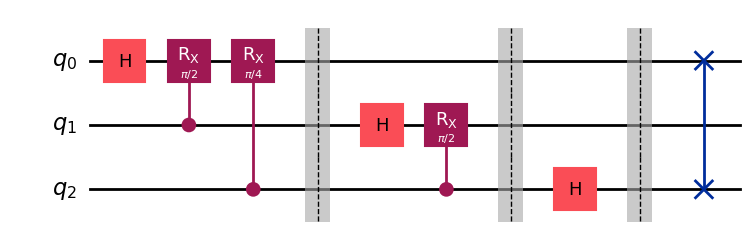

In [3]:
n = 3
c = QuantumCircuit(n)
circuit = qft(c,n)
circuit.draw('mpl')

In [4]:
def qftt (qc, n ):

    for i in range(n):
        qc.h(i)
        
        for j in range(i+1, n):
            angle = np.pi/2 ** (j-1)
            qc.crx(angle ,j,i)
        qc.barrier()
        
    for i in range(n//2):
        qc.swap(i, n-i-1)
    return qc

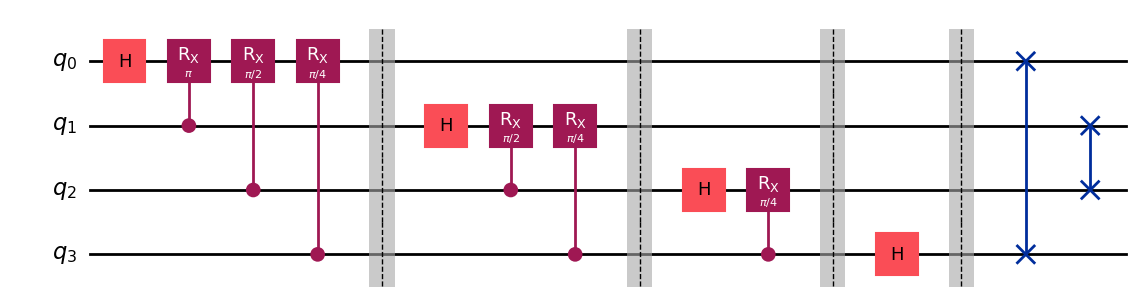

In [5]:
n= 4
qc = QuantumCircuit(n)
circuit = qftt(qc,n)
circuit.draw('mpl')

In [6]:
def inverse_qft(qc, n):
    """Applies Inverse Quantum Fourier Transform on the first n qubits of the circuit."""
    for i in range(n//2):
        circuit.swap(i, n-i-1)
    
    for i in reversed(range(n)):
        for j in reversed(range(i+1, n)):
            circuit.crx(-np.pi / 2**(j-i), j, i)
        circuit.h(i)
    
    return circuit


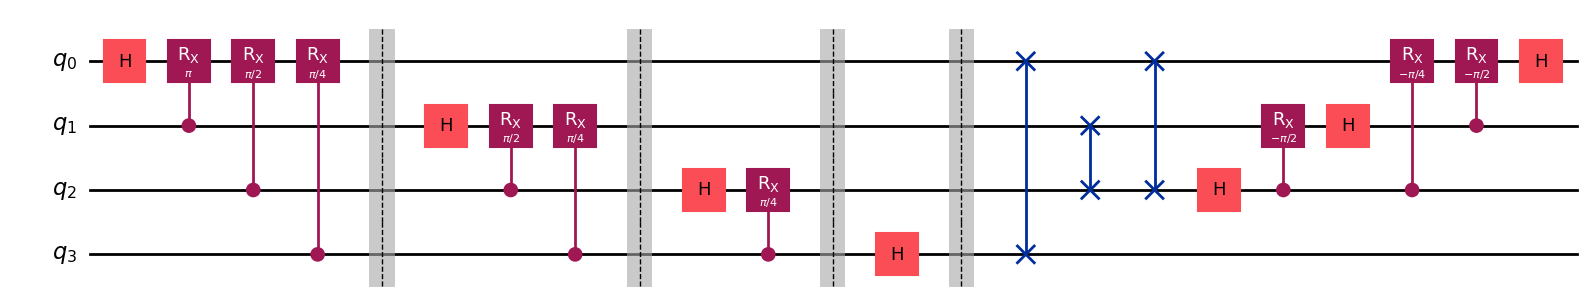

In [7]:
n= 3
q2 = QuantumCircuit(n)
circuit2 = inverse_qft(q2,n)
circuit2.draw('mpl')